In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# of Rows and Columns 
df.shape

(891, 12)

In [5]:
#List of columns
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
#info of every attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#INFO about numerical values
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#INFO on non numerical values
df.describe(include=["object","bool"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Greenberg, Mr. Samuel",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
#Removing the non essential attributes
df.drop(["PassengerId","Name","Ticket"],inplace=True,axis=1)

In [10]:
df.drop(["Cabin"],inplace = True,axis =1)

In [11]:
d = {"male":1,"female":0}
df["Sex"] = df["Sex"].map(d)

In [12]:
#Calculate the sum of all null values for each attribute if any
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
#Handling the missing values for Age and Embarked
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(axis=0,method="bfill")

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# EDA

#  UNIVARIATE ANALYSIS

1. QUANTITATIVE VARIABLES

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

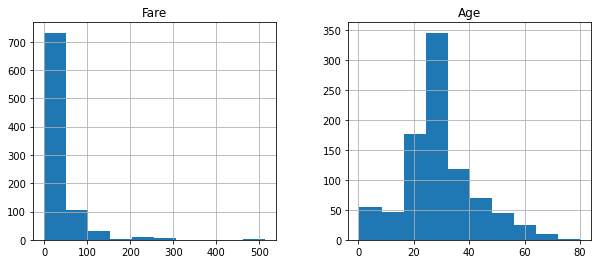

In [15]:
features = ["Fare","Age"]
df[features].hist(figsize=(10,4))

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

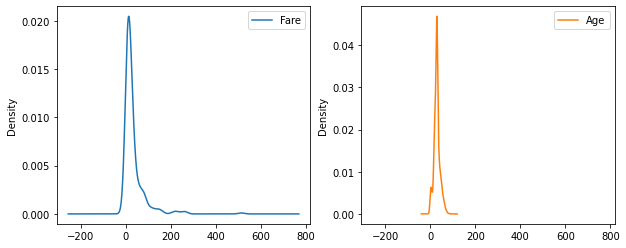

In [16]:
df[features].plot(kind="density",subplots=True,layout=(1,2),figsize=(10,4))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

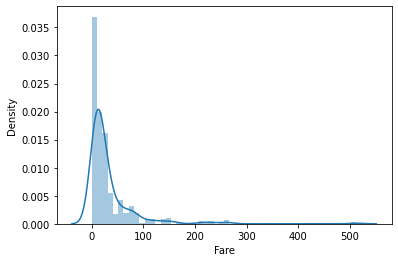

In [17]:
sns.distplot(df["Fare"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

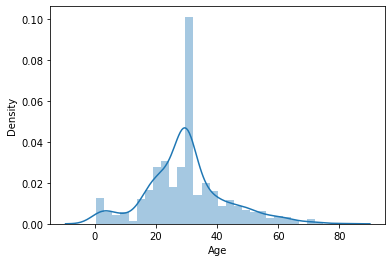

In [18]:
sns.distplot(df["Age"])

2. Categorical values

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='Embarked', ylabel='count'>

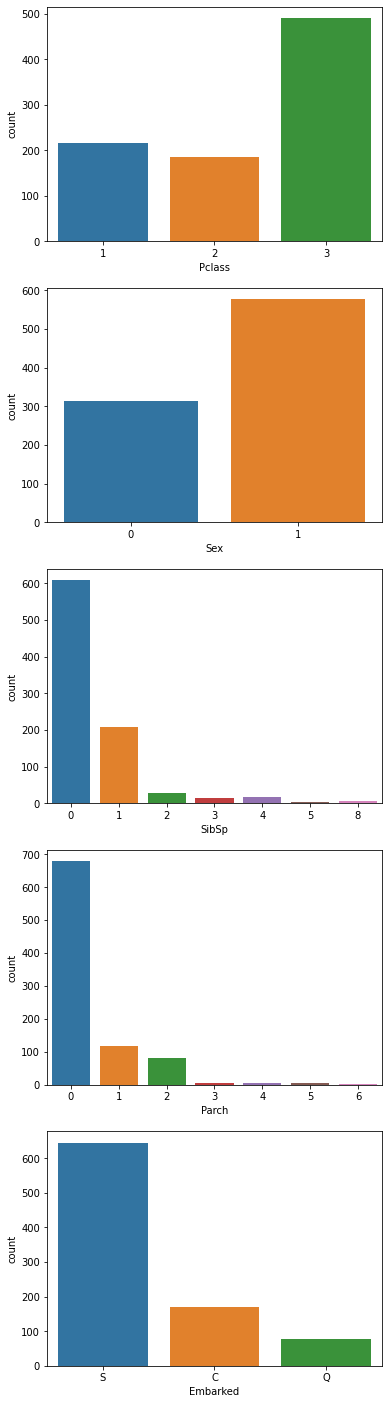

In [19]:
_,axes=plt.subplots(5,1,figsize=(6,25))


sns.countplot("Pclass",data=df,ax=axes[0])
sns.countplot("Sex",data=df,ax=axes[1])
sns.countplot("SibSp",data=df,ax=axes[2])
sns.countplot("Parch",data=df,ax=axes[3])
sns.countplot("Embarked",data=df,ax=axes[4])

# MULTIVARIATE ANALYSIS


# # SURVIVAL STATS

In [20]:
df["Survived"] = df["Survived"].map({0:"No",1:"Yes"})

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

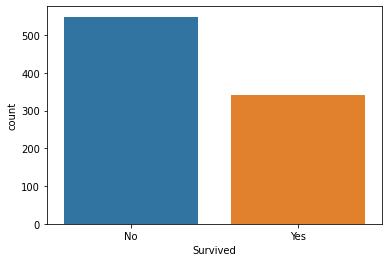

In [21]:
sns.countplot("Survived",data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

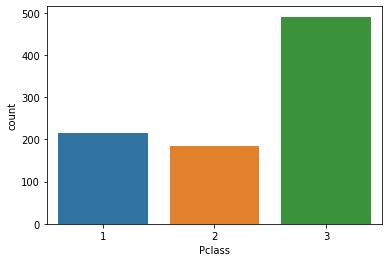

In [22]:
'''
1st = Upper
2nd = Middle
3rd = Lower

'''

sns.countplot("Pclass", data = df)

1. SURVIVAL VS PCLASS

In [23]:
#Did the pclass influence the survival rate of the person
pd.crosstab(df["Survived"],df["Pclass"],margins=True).T

Survived,No,Yes,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

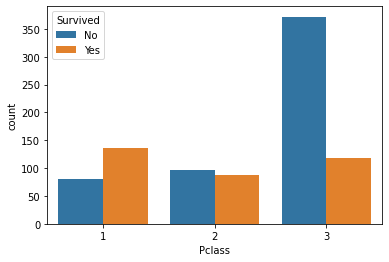

In [24]:
sns.countplot("Pclass",hue="Survived",data=df)

Out of the 342 people that survived, the most were from Pclass 1 and 3. Flipside the people who died more are form Pclass 3. Henceforth we can infer that if a person was in Pclass 1, he/she would have the highest survival rate 

2. SURVIVAL VS SEX

In [25]:
#Relationship b/w the sex and the survival rate
pd.crosstab(df["Sex"],df["Survived"],margins=True)

Survived,No,Yes,All
Sex,,,
0,81,233,314
1,468,109,577
All,549,342,891


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

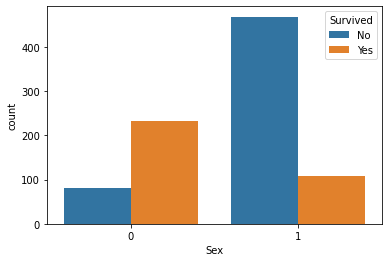

In [26]:
sns.countplot("Sex",hue="Survived",data = df)

Females have higher chance of survival than that of males

3. SURVIVAL VS AGE/FARE

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


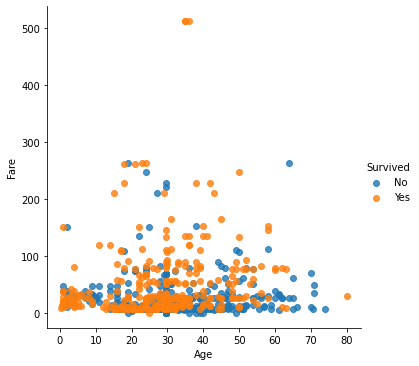

In [27]:
sns.lmplot("Age","Fare",hue="Survived",data = df,fit_reg=False)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

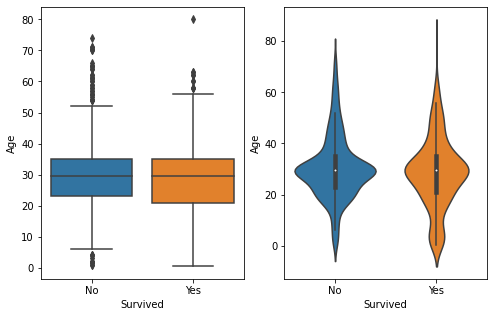

In [28]:
_,axes = plt.subplots(1,2,figsize=(8,5))

sns.boxplot(y="Age",x="Survived",data = df,ax = axes[0])
sns.violinplot(y="Age",x="Survived",data = df,ax=axes[1])

Younger people have higher chance of surviving. As the age increases, the Survival rate decreases
The Fare does not have any linear relation with the survival rate. 

4. SURVIVAL RATE VS SibSp/Parch

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

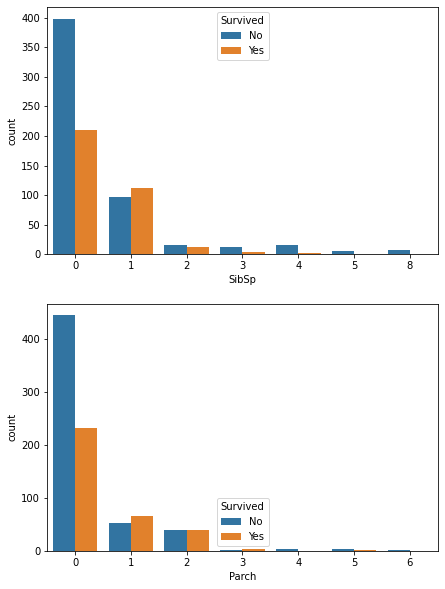

In [29]:
_,axes = plt.subplots(2,1,figsize=(7,10))

sns.countplot("SibSp",hue="Survived",data=df,ax=axes[0])
sns.countplot("Parch",hue="Survived",data=df,ax=axes[1])

As the number of (sibling,spouse) and (child per parent increases),the survival rate decreases. Henceforth,lesser the number of family members, the merrier!

5. SURVIVAL VS EMBARKED

'''
C = Cherbourg, Q = Queenstown, S = Southampton
'''

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

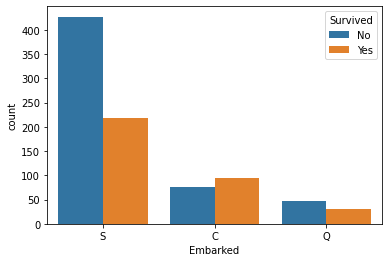

In [30]:
sns.countplot("Embarked",hue="Survived",data =df)

Clearly, the people from Southampton ended up surviving compared to the other ports

In [31]:
# Mean of the fare men paid
df[df["Sex"]==1]["Fare"].mean()

25.523893414211443

In [32]:
# Mean of fare women paid
df[df["Sex"]==0]["Fare"].mean()

44.47981783439491

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

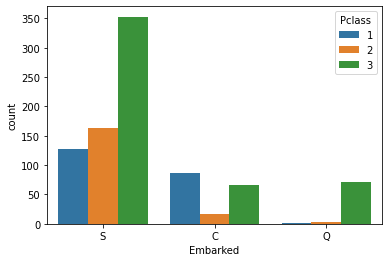

In [33]:
# Count of people in different passenger class at different ports
sns.countplot("Embarked",hue="Pclass",data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

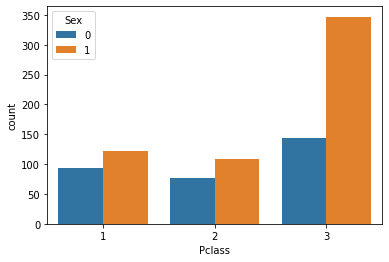

In [34]:
# How many males/females were there in different Pclass
sns.countplot("Pclass",hue="Sex",data =df)

In [35]:
#Cost for each passenger class
for i in range(1,4):
    print("Average Fare for entering Passenger Class {}".format(i),"is {:.2f}".format(df[df["Pclass"]==i]["Fare"].mean()))

Average Fare for entering Passenger Class 1 is 84.15
Average Fare for entering Passenger Class 2 is 20.66
Average Fare for entering Passenger Class 3 is 13.68


In [36]:
#Average age and max age of people in each passenger Class
for i in range(1,4):
    print("Average age in Passenger Class {}".format(i),"is {:.2f}".format(df[df["Pclass"]==i]["Age"].mean()))
print("------------------------------------------------------")
for i in range(1,4):
    print("Maximum age in Passenger Class {}".format(i),"is {:.2f}".format(df[df["Pclass"]==i]["Age"].max()))

Average age in Passenger Class 1 is 37.05
Average age in Passenger Class 2 is 29.87
Average age in Passenger Class 3 is 26.40
------------------------------------------------------
Maximum age in Passenger Class 1 is 80.00
Maximum age in Passenger Class 2 is 70.00
Maximum age in Passenger Class 3 is 74.00


In [37]:
df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


In [38]:
df.cov()

,Pclass,Sex,Age,SibSp,Parch,Fare
Pclass,0.699015,0.052712,-3.601855,0.076599,0.012429,-22.830196
Sex,0.052712,0.228475,0.523000,-0.060422,-0.094584,-4.330946
Age,-3.601855,0.523000,169.052400,-3.335345,-1.877987,59.162200
SibSp,0.076599,-0.060422,-3.335345,1.216043,0.368739,8.748734
Parch,0.012429,-0.094584,-1.877987,0.368739,0.649728,8.661052
Fare,-22.830196,-4.330946,59.162200,8.748734,8.661052,2469.436846


<AxesSubplot:>

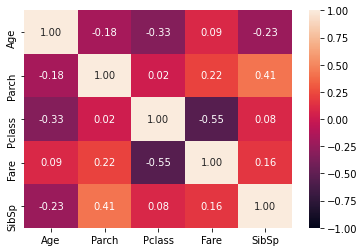

In [39]:
numerical = list(set(df.columns)
                 -{"Sex",
                   "Embarked",
                   "Survival"})
sns.heatmap(data=df[numerical].corr(),annot=True,fmt=".2f",vmin=-1,vmax=1)

None of the features are highly correlated, so safe to say, we can continue ahead

In [40]:
df["Survived"] = df["Survived"].map({"No":0 ,"Yes":1})
df = df.drop(["Embarked"],axis=1)

In [41]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Using Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [46]:
y_pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred)*100)

[[95 16]
 [24 44]]
77.6536312849162


# Using KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred_knn = classifier_knn.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(y_test,y_pred_knn)
print(cm)
print(accuracy_score(y_test,y_pred_knn)*100)

[[99 12]
 [18 50]]
83.24022346368714


# Using SVM

In [51]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [52]:
y_pred_svm = classifier_svm.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(y_test,y_pred_svm)
print(cm)
print(accuracy_score(y_test,y_pred_svm)*100)

[[97 14]
 [21 47]]
80.44692737430168


# Using Decision Tree 

In [54]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
y_pred_dt = classifier_dt.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(y_test,y_pred_dt)
print(cm)
print(accuracy_score(y_test,y_pred_dt)*100)

[[92 19]
 [21 47]]
77.6536312849162


# Using Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier_rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [58]:
y_pred_rfc = classifier_rfc.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred_rfc)
print(cm)
print(accuracy_score(y_test,y_pred_rfc)*100)

[[105   6]
 [ 26  42]]
82.12290502793296


# Submitting the predictions 

In [60]:
test  = pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
test_X.info()

NameError: name 'test_X' is not defined

In [62]:
test["Sex"] = test["Sex"].map(d)
predictor_cols = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
test_X = test[predictor_cols]

In [63]:
#Handling the missing values in test dataset
test_X["Age"] = test_X["Age"].fillna(test_X["Age"].mean())
test_X["Fare"] = test_X["Fare"].fillna(axis = 0,method="bfill")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
predict_survived = classifier_knn.predict(test_X)
print(predict_survived)

[0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0
 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0
 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 1 0 0 1 0 0 1]


In [65]:
my_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predict_survived})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)